In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("trecking data.csv")
data

,Unnamed: 0,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,0,23,Team,Male,Yes,No,Fast food,Yes,Rainy,Yes,four
1,1,24,Team,Male,Yes,No,Homely food,No,Rainy,Yes,four
2,2,23,Team,Male,No,No,Fast food,Yes,Rainy,Yes,four
3,3,25,Team,Male,No,No,Fast food,No,Rainy,Yes,four
4,4,22,Team,Female,No,No,Homely food,No,Rainy,Yes,two
...,...,...,...,...,...,...,...,...,...,...,...
403,403,14,Team,NaN,No,No,Homely food,Yes,Rainy,No,two
404,404,15,Solo,Male,Yes,No,Homely food,No,Rainy,No,one
405,405,16,Solo,Male,Yes,Yes,Fast food,Yes,Rainy,Yes,one
406,406,17,Solo,Male,Yes,No,Fast food,No,Rainy,No,one


In [3]:
data.dtypes

Unnamed: 0                 int64
age                        int64
solo/team                 object
M/F                       object
Are you smoker            object
jeep_service              object
food_habit                object
exercise                  object
climate                   object
status                    object
Nomber of team members    object
dtype: object

In [4]:
data.isna().sum()

Unnamed: 0                0
age                       0
solo/team                 3
M/F                       4
Are you smoker            1
jeep_service              1
food_habit                3
exercise                  0
climate                   0
status                    0
Nomber of team members    2
dtype: int64

In [14]:
data["Nomber of team members"]=data["Nomber of team members"].replace({"unkown":"zero","tree":"three"})

In [15]:
print(data["solo/team"].unique())
print(data["food_habit"].unique())
print(data["Nomber of team members"].unique())

[1 0]
[0 1]
['four' 'two' 'three' 'five' 'one' 'zero' 'eight']


In [16]:
data.head(20)

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,23,1,1,1,0,0,1,1,1,four
1,24,1,1,1,0,1,0,1,1,four
2,23,1,1,0,0,0,1,1,1,four
3,25,1,1,0,0,0,0,1,1,four
4,22,1,0,0,0,1,0,1,1,two
5,27,1,1,1,0,0,0,1,0,two
6,41,1,1,1,0,0,0,1,0,three
7,15,1,0,0,0,1,0,1,0,three
8,17,1,1,0,0,1,1,1,1,three
9,41,1,1,1,1,1,1,0,1,five


In [8]:
data["solo/team"]=data["solo/team"].fillna(method="ffill")
data["M/F"]=data["M/F"].fillna(method="bfill")
data["Are you smoker"]=data["Are you smoker"].fillna(method="ffill")
data["jeep_service"]=data["jeep_service"].fillna(method="bfill")
data["food_habit"]=data["food_habit"].fillna(method="ffill")
data["Nomber of team members"]=data["Nomber of team members"].fillna(method="bfill")


In [9]:
lb=LabelEncoder()
data["solo/team"]=lb.fit_transform(data["solo/team"])
data["M/F"]=lb.fit_transform(data["M/F"])
data["Are you smoker"]=lb.fit_transform(data["Are you smoker"])
data["jeep_service"]=lb.fit_transform(data["jeep_service"])
data["food_habit"]=lb.fit_transform(data["food_habit"])
data["exercise"]=lb.fit_transform(data["exercise"])
data["climate"]=lb.fit_transform(data["climate"])
data["status"]=lb.fit_transform(data["status"])


In [10]:
data.dtypes

Unnamed: 0                 int64
age                        int64
solo/team                  int32
M/F                        int32
Are you smoker             int32
jeep_service               int32
food_habit                 int32
exercise                   int32
climate                    int32
status                     int32
Nomber of team members    object
dtype: object

In [11]:
data=data.drop("Unnamed: 0",axis=1)

In [17]:
from word2number import w2n
data["Nomber of team members"]=data["Nomber of team members"].apply(w2n.word_to_num)

In [18]:
data

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,23,1,1,1,0,0,1,1,1,4
1,24,1,1,1,0,1,0,1,1,4
2,23,1,1,0,0,0,1,1,1,4
3,25,1,1,0,0,0,0,1,1,4
4,22,1,0,0,0,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
403,14,1,1,0,0,1,1,1,0,2
404,15,0,1,1,0,1,0,1,0,1
405,16,0,1,1,1,0,1,1,1,1
406,17,0,1,1,0,0,0,1,0,1


Text(0, 0.5, 'status')

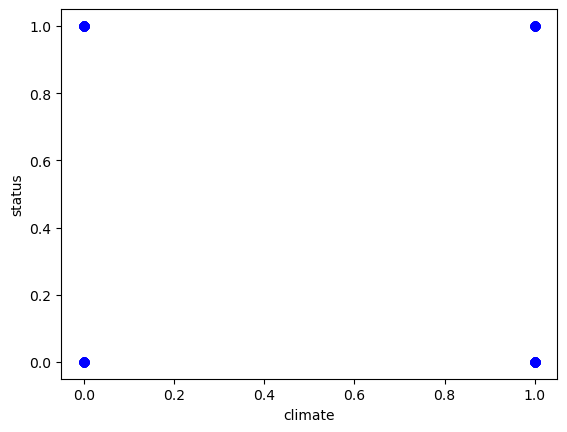

In [79]:
plt.scatter(data["climate"],data["status"],color="blue")
plt.xlabel("climate")
plt.ylabel("status")

Text(0, 0.5, 'status')

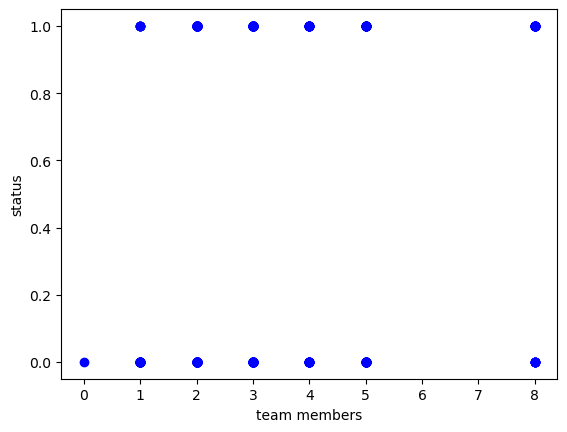

In [80]:
plt.scatter(data["Nomber of team members"],data["status"],color="blue")
plt.xlabel("team members")
plt.ylabel("status")

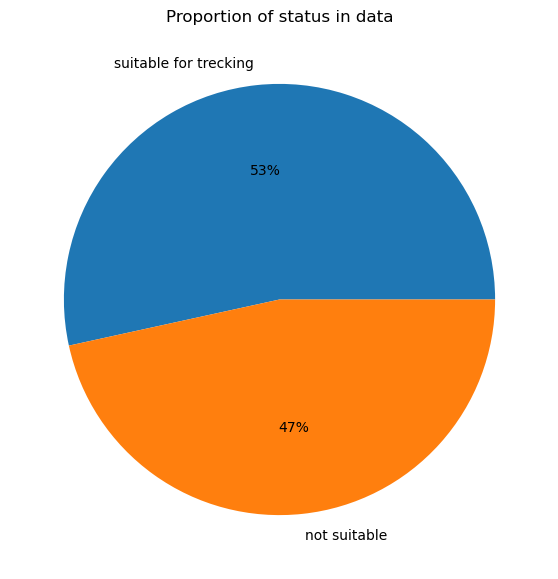

In [98]:
plt.figure(figsize=(7,7))
plt.pie(data["status"].value_counts().values,labels=["suitable for trecking","not suitable"],autopct="%1.0f%%")
plt.title("Proportion of status in data")
plt.show()

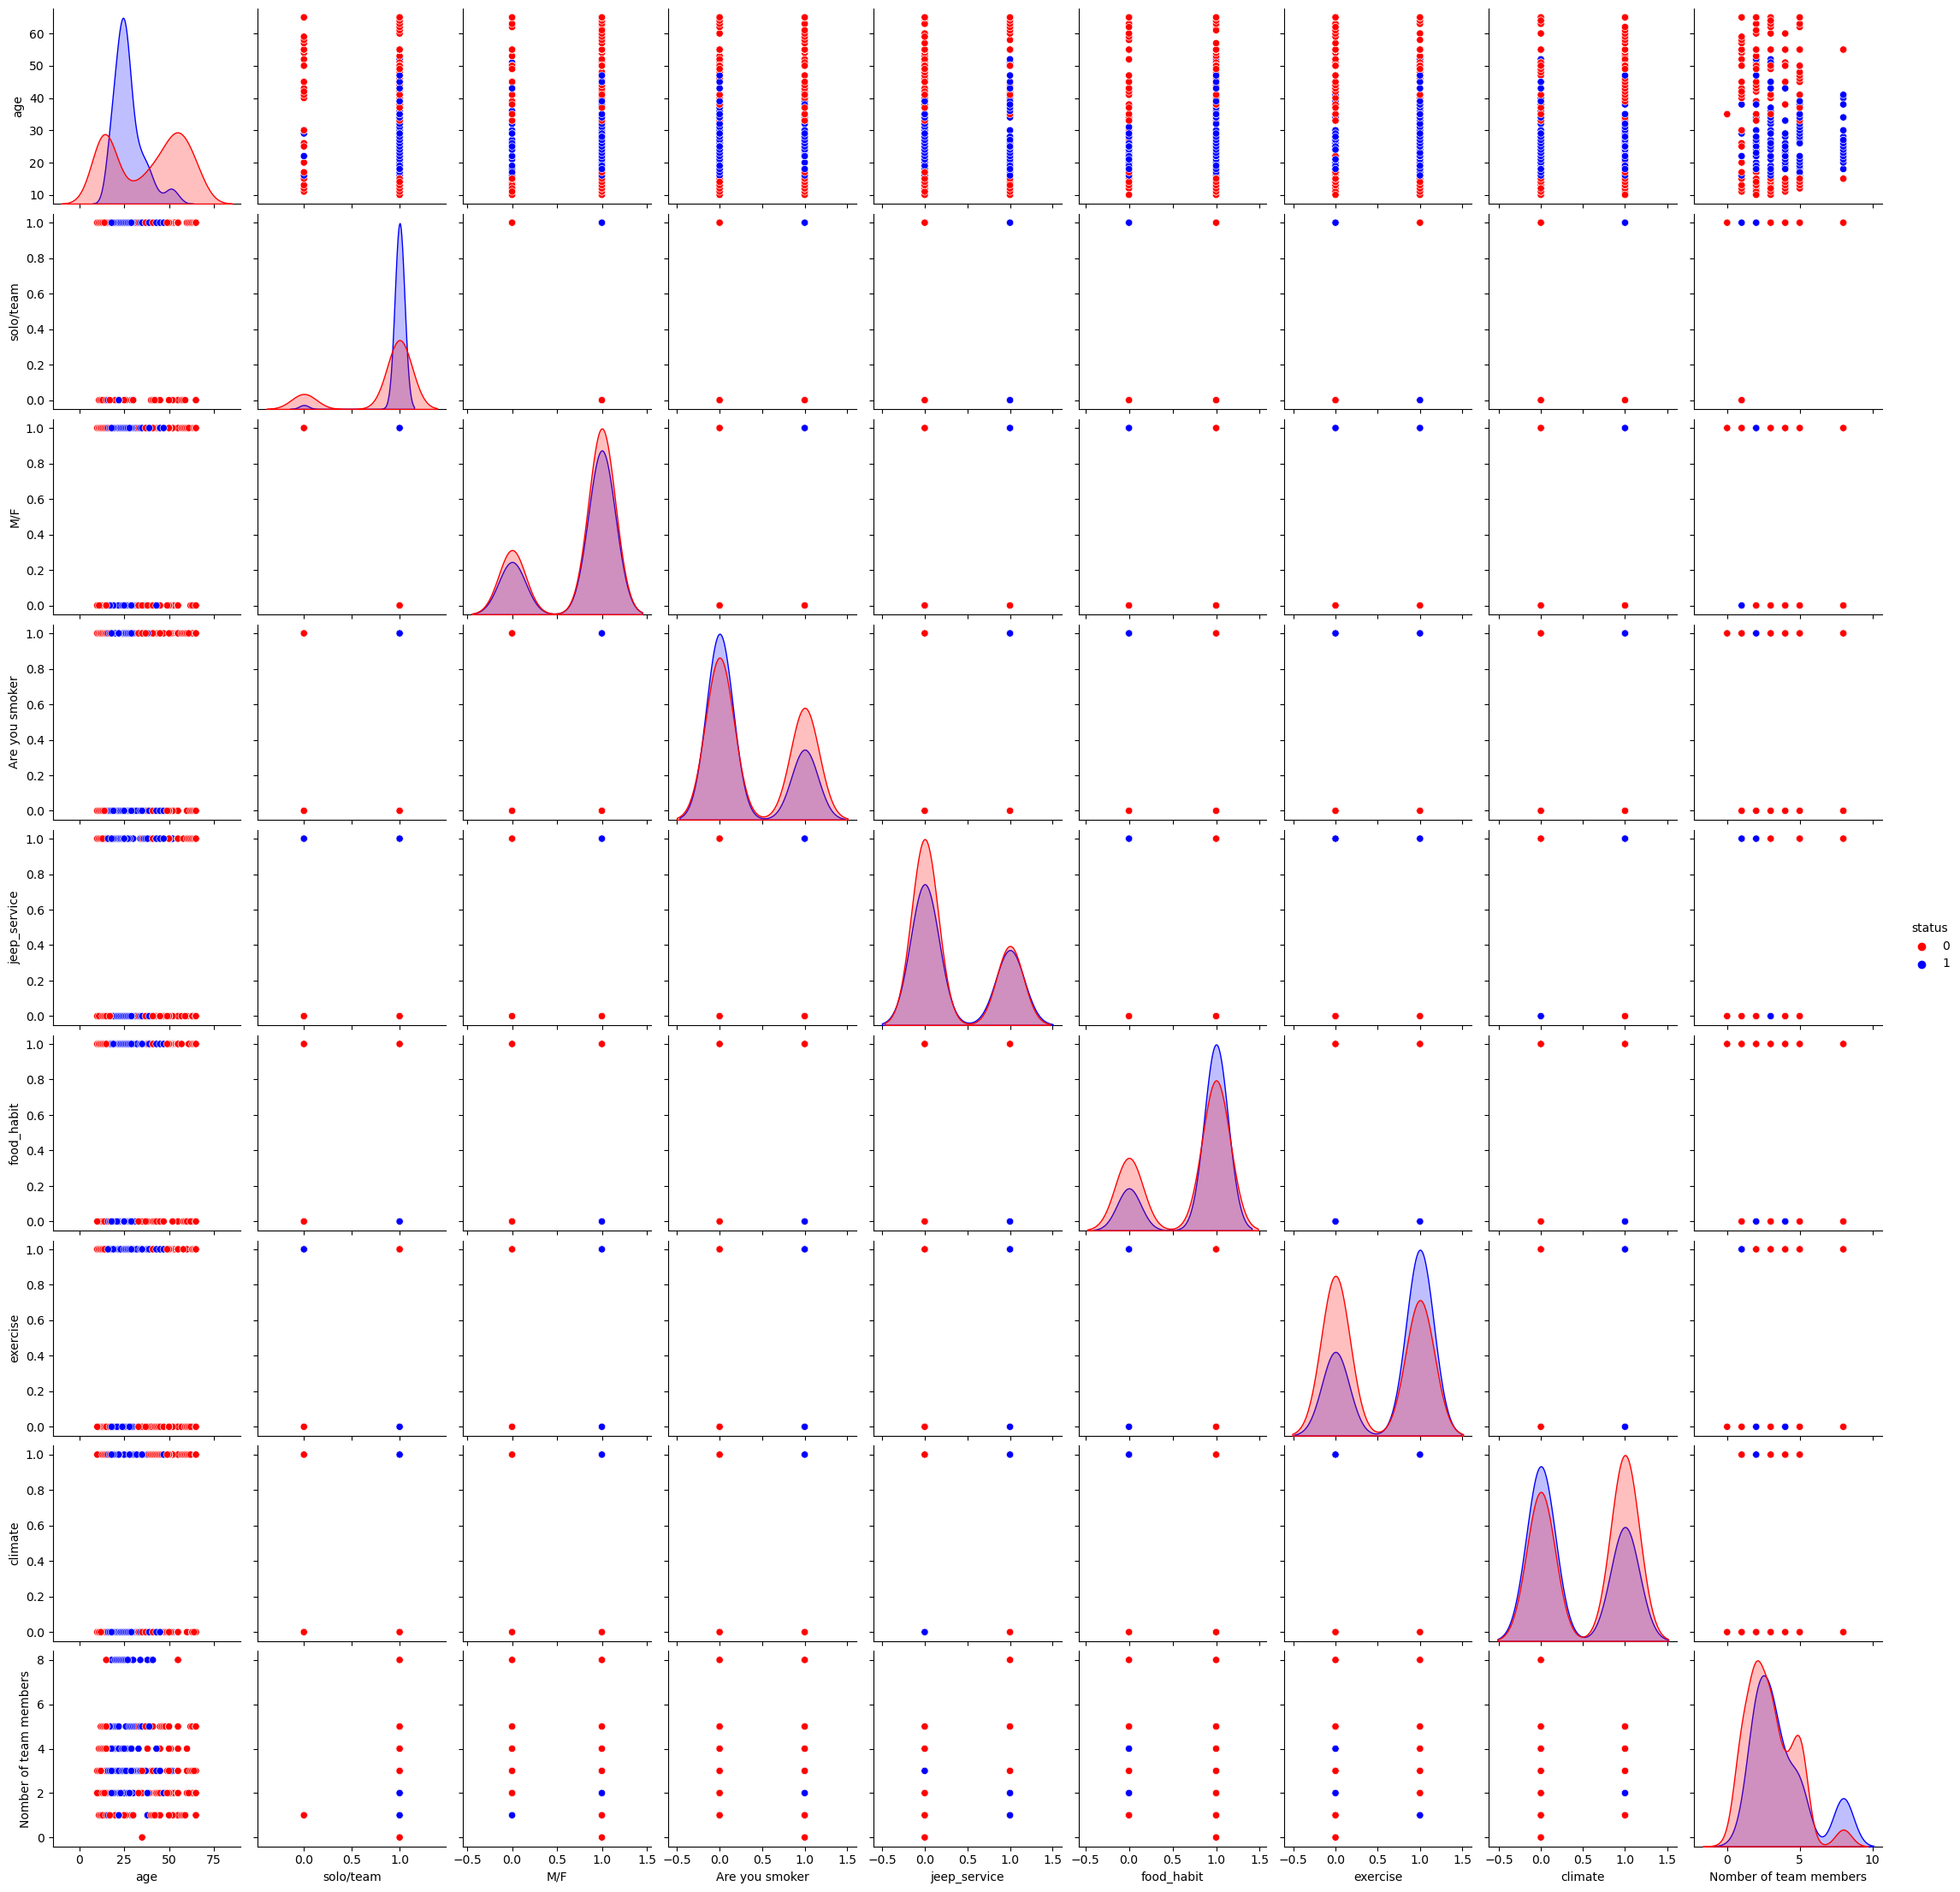

In [100]:
#pairplot between features
sns.pairplot(data,hue="status",palette=["red","blue"])

In [24]:
#cross validation
x=data.drop("status",axis=1)
y=data["status"]


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC 
import warnings
warnings.filterwarnings("ignore")

In [64]:
log_score=cross_val_score(LogisticRegression(),X=x,y=y,cv=5)
rf_score=cross_val_score(RandomForestClassifier(random_state=43),X=x,y=y)
sv_score=cross_val_score(SVC(),X=x,y=y)
Ab_score=cross_val_score(AdaBoostClassifier(),X=x,y=y)

In [65]:
print(log_score)
print(rf_score)
print(sv_score)
print(Ab_score)

[0.69512195 0.73170732 0.63414634 0.72839506 0.60493827]
[0.90243902 0.8902439  0.91463415 0.9382716  0.91358025]
[0.79268293 0.7804878  1.         0.90123457 0.81481481]
[0.92682927 0.92682927 0.95121951 1.         0.95061728]


In [66]:
print(np.mean(log_score))
print(np.mean(rf_score))
print(np.mean(sv_score))
print(np.mean(Ab_score))

0.6788617886178863
0.9118337850045167
0.8578440228846732
0.9510990665462209


In [32]:
#here we noticed that Adaboostclassifier is the best algorithm suitable for this data
#we want to find the best parameter
from sklearn.model_selection import GridSearchCV

In [68]:
gs=GridSearchCV(AdaBoostClassifier(),{"n_estimators":[5,10,15,20,30,40,50],"learning_rate":[.2,.3,.5,.6,.7,.9]})
gs.fit(x,y)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.3, 0.5, 0.6, 0.7, 0.9],
                         'n_estimators': [5, 10, 15, 20, 30, 40, 50]})

In [69]:
g=gs.cv_results_
pd.DataFrame(g)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016110,6.170803e-03,0.002593,2.148582e-03,0.2,5,"{'learning_rate': 0.2, 'n_estimators': 5}",0.804878,0.817073,1.000000,0.938272,0.839506,0.879946,0.076208,35
1,0.021872,7.652534e-03,0.006250,7.654480e-03,0.2,10,"{'learning_rate': 0.2, 'n_estimators': 10}",0.804878,0.817073,1.000000,0.938272,0.864198,0.884884,0.074201,33
2,0.034377,6.255293e-03,0.003125,6.249523e-03,0.2,15,"{'learning_rate': 0.2, 'n_estimators': 15}",0.804878,0.792683,0.987805,0.938272,0.851852,0.875098,0.076102,39
3,0.043743,6.248620e-03,0.006250,7.654889e-03,0.2,20,"{'learning_rate': 0.2, 'n_estimators': 20}",0.804878,0.829268,0.963415,0.938272,0.876543,0.882475,0.060913,34
4,0.062495,4.909339e-07,0.011579,1.027433e-02,0.2,30,"{'learning_rate': 0.2, 'n_estimators': 30}",0.841463,0.829268,0.926829,0.938272,0.888889,0.884944,0.043827,32
5,0.091004,4.177368e-03,0.003125,6.250095e-03,0.2,40,"{'learning_rate': 0.2, 'n_estimators': 40}",0.841463,0.853659,0.926829,0.938272,0.925926,0.897230,0.040969,29
6,0.103576,8.083510e-03,0.016922,2.581635e-03,0.2,50,"{'learning_rate': 0.2, 'n_estimators': 50}",0.853659,0.853659,0.939024,0.962963,0.925926,0.907046,0.045180,25
7,0.015624,6.843901e-07,0.000000,0.000000e+00,0.3,5,"{'learning_rate': 0.3, 'n_estimators': 5}",0.804878,0.817073,1.000000,0.938272,0.839506,0.879946,0.076208,35
8,0.021876,7.658862e-03,0.006250,7.654539e-03,0.3,10,"{'learning_rate': 0.3, 'n_estimators': 10}",0.804878,0.804878,0.987805,0.938272,0.851852,0.877537,0.073575,37
9,0.031247,6.843901e-07,0.006250,7.655239e-03,0.3,15,"{'learning_rate': 0.3, 'n_estimators': 15}",0.841463,0.817073,0.975610,0.938272,0.876543,0.889792,0.059185,31


In [70]:
gs.best_params_

{'learning_rate': 0.9, 'n_estimators': 30}

In [71]:
gs.best_score_

0.9559470039144836

RandomForestClassifier

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=.25)

In [95]:
model=AdaBoostClassifier(n_estimators=30,learning_rate=.9,random_state=35)
model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.9, n_estimators=30, random_state=35)

In [96]:
model.score(x_test,y_test)

0.9803921568627451

In [81]:
y_pred=model.predict(x_test)
pd.DataFrame({"true value":y_test,"predicted value":y_pred})

,true value,predicted value
103,0,0
143,1,1
355,1,1
191,1,1
219,1,1
...,...,...
130,1,1
314,1,1
140,1,1
391,1,1


In [82]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

In [83]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[45,  1],
       [ 1, 55]], dtype=int64)

<AxesSubplot:>

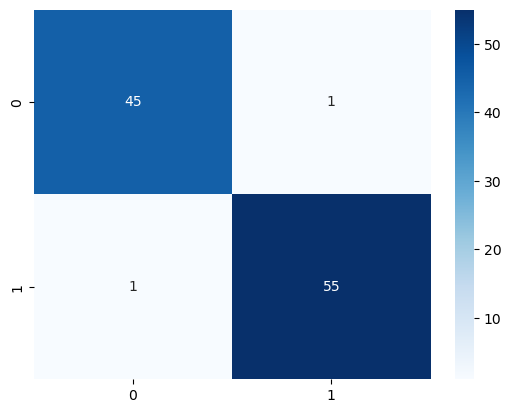

In [86]:
sns.heatmap(cm,annot=True,cmap="Blues")